In [3]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [9]:
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [10]:
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
train_X.shape

(400, 20)

In [13]:
test_X.shape

(100, 20)

In [14]:
train_y.shape

(400,)

In [15]:
test_y.shape

(100,)

In [18]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred_y1 = clf1.predict(test_X)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y1)

0.71

In [22]:
pred_y2 = clf2.predict(test_X)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y2)

0.7

In [25]:
from sklearn.metrics import confusion_matrix
print(clf1.classes_)
confusion_matrix(test_y, pred_y1)

[0 1]


array([[10, 21],
       [ 8, 61]])

In [26]:
from sklearn.metrics import confusion_matrix
print(clf2.classes_)
confusion_matrix(test_y, pred_y2)

[0 1]


array([[ 7, 24],
       [ 6, 63]])

In [31]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(test_y, clf1.predict_proba(test_X)[:,1])
auc(fpr1, tpr1)

0.6390836839644694

In [33]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold2 = roc_curve(test_y, clf2.predict_proba(test_X)[:,1])
auc(fpr2, tpr2)

0.7531556802244039

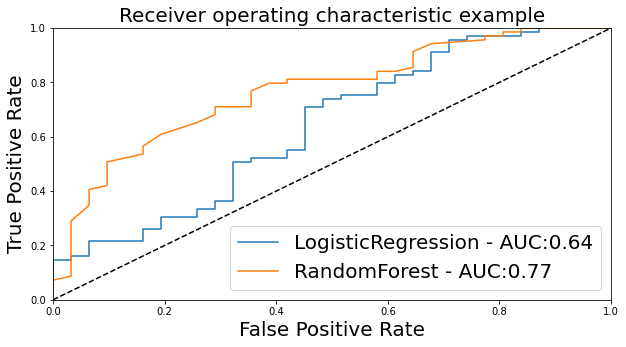

In [36]:
from sklearn.metrics import auc
from matplotlib import pyplot as plt

plt.figure(figsize= [10,5])

for clf, title in zip([clf1,clf2], ['LogisticRegression', 'RandomForest']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  #plt.plot(fpr, tpr, label='%s'%(title) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Feature Selection

In [37]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [39]:
df.head()

,bachelor,gender,age,salary,purchased
0,1,0,23,1500,0
1,1,0,30,2500,1
2,1,0,32,1800,1
3,1,0,25,1700,0
4,1,0,27,1200,0


In [40]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]

In [41]:
X.head()

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200


In [42]:
sel = VarianceThreshold()

In [43]:
X_val = sel.fit_transform(X)

In [46]:
X_val[0:3,:]

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800]])

In [47]:
sel.get_support()

array([False,  True,  True,  True])

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['bachelor','gender', 'age', 'salary']]
y = df['purchased'].values

In [49]:
clf = SelectKBest(chi2, k=2)

In [50]:
clf.fit(X,y)
print(clf.scores_)

[   0.            0.            4.48447205 2766.66666667]


In [52]:
X_new = clf.fit_transform(X,y)
X_new

array([[  23, 1500],
       [  30, 2500],
       [  32, 1800],
       [  25, 1700],
       [  27, 1200],
       [  26, 1000],
       [  35, 3500],
       [  23, 2000],
       [  22, 1800],
       [  21, 1700],
       [  38, 5000],
       [  20, 1200]])

In [72]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]
sel = VarianceThreshold()
X_val = sel.fit_transform(X)
sel.get_support()
names = X.loc[:,sel.get_support()].columns 
names
#names = df.columns[sel.get_support()]

Index(['gender', 'age', 'salary'], dtype='object')

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=1)

rfe.fit(X_val,y)



RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=1, step=1, verbose=0)

In [74]:
for x in rfe.ranking_:
    print(names[x-1], rfe.ranking_[x-1])

salary 1
age 2
gender 3


In [75]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=2)

rfe.fit(X_val,y)

RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=2, step=1, verbose=0)

In [77]:
rfe.ranking_

array([2, 1, 1])

In [79]:
from sklearn.feature_selection import RFECV
selector = RFECV(clf, step=1, cv=5)

In [83]:
selector.fit(X_val,y)

RFECV(cv=5,
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [84]:
selector.get_support()

array([False, False,  True])

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,random_state=123)

In [86]:
clf.fit(X_val, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [87]:
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
  print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


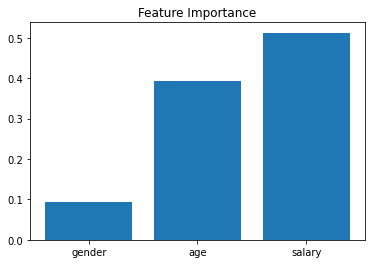

In [88]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), clf.feature_importances_)
plt.xticks(range(0,len(names)), names)
plt.show()